# Table of contents

* [Setup](#Setup)
  * [Module imports](#Module-imports)
  * [Load spark session and data](#Load-spark-session-and-data)
  * [Declare globals](#Declare-globals)
* [Distribution of values](#Distribution-of-values)

# Setup

## Module imports

In [1]:
from pyspark.sql import SparkSession
from IPython.display import Image
import importlib
import numpy as np

In [2]:
from modules.load import read_file
from modules.plots import catplot, countplot, display_images, distribution

## Load spark session and data

In [3]:
spark = SparkSession.builder.appName("Test").getOrCreate()

In [4]:
df = read_file(spark, "data/transactions.ndjson")

## Declare globals

All the column names in the dataset shown for reference

In [5]:
np.array(df.columns).reshape((13,3)).tolist()

[['accountNumber', 'accountOpenDate', 'acqCountry'],
 ['availableMoney', 'cardCVV', 'cardLast4Digits'],
 ['cardPresent', 'creditLimit', 'currentBalance'],
 ['currentExpDate', 'customerId', 'dateOfLastAddressChange'],
 ['enteredCVV', 'expirationDateKeyInMatch', 'isFraud'],
 ['merchantCategoryCode', 'merchantCountryCode', 'merchantName'],
 ['posConditionCode', 'posEntryMode', 'transactionAmount'],
 ['transactionDateTime', 'transactionType', 'creditLimitIndexed'],
 ['merchantNameIndexed', 'acqCountryIndexed', 'merchantCountryCodeIndexed'],
 ['posEntryModeIndexed',
  'posConditionCodeIndexed',
  'merchantCategoryCodeIndexed'],
 ['transactionTypeIndexed', 'creditLimitEncoded', 'merchantNameEncoded'],
 ['acqCountryEncoded', 'merchantCountryCodeEncoded', 'posEntryModeEncoded'],
 ['posConditionCodeEncoded',
  'merchantCategoryCodeEncoded',
  'transactionTypeEncoded']]

### Labels and groups
Assign names to columns grouped by type for labeling purposes

In [29]:
# Define the list of decimal type columns
decimal_cols = [col for col, dtype in df.dtypes if "decimal" in dtype]

# Define the list of numerical type columns
numerical_cols = [col for col, dtype in df.dtypes if ("decimal" in dtype) or ("double" in dtype) or ("int" in dtype)]

# Define the list of categorical columns
categorical_cols = [
    "creditLimit",
    "merchantName",
    "acqCountry",
    "merchantCountryCode",
    "posEntryMode",
    "posConditionCode",
    "merchantCategoryCode",
    "transactionType"
]

catkinds = ["strip", "box", "boxen", "violin"]

# Distribution of values

### Single variable plots

In [7]:
# Look at the distribution of values of all the numerical columns
for col in numerical_cols:
    continue
    distribution(df.select(col), col)
for col in categorical_cols:
    continue
    countplot(df.select(col), col)

In [8]:
display_images(["availableMoney_distribution.png", "creditLimit_distribution.png", "currentBalance_distribution.png"], width=400, height=300)
display_images(["transactionAmount_distribution.png", "creditLimit_barchart.png", "acqCountry_barchart.png"], width=400, height=300)
display_images(["merchantCountryCode_barchart.png", "posEntryMode_barchart.png", "posConditionCode_barchart.png"], width=400, height=300)
display_images(["merchantCategoryCode_barchart.png", "transactionType_barchart.png"], width=400, height=300)

### Single variable grouped by fraud/not fraud

In [34]:
for col in deicmal_cols:
    continue
    for kind in catkinds:
        catplot(df.select("isFraud", col), "isFraud", col, kind=kind)

In [35]:
for kind in catkinds:
    display_images([f"{decimal_cols[0]}_{kind}plot_by_isFraud.png", 
                    f"{decimal_cols[1]}_{kind}plot_by_isFraud.png", 
                    f"{decimal_cols[2]}_{kind}plot_by_isFraud.png", 
                    f"{decimal_cols[3]}_{kind}plot_by_isFraud.png", 
                    ], width=300, height=225)

1. The values of "availableMoney" variable is very similar between legit/fraud groups.
2. "creditLimit" is a little more widely distributed in fraud group compared to legit group.
3. Greater proportion of legit accounts have "currentBalance" and "transactionAmount" very close to zero compared to fraud group.

## Three-variable analysis
Next I looked at the distribution of numerical variables for the fraud/legit groups, split by categorical variables.

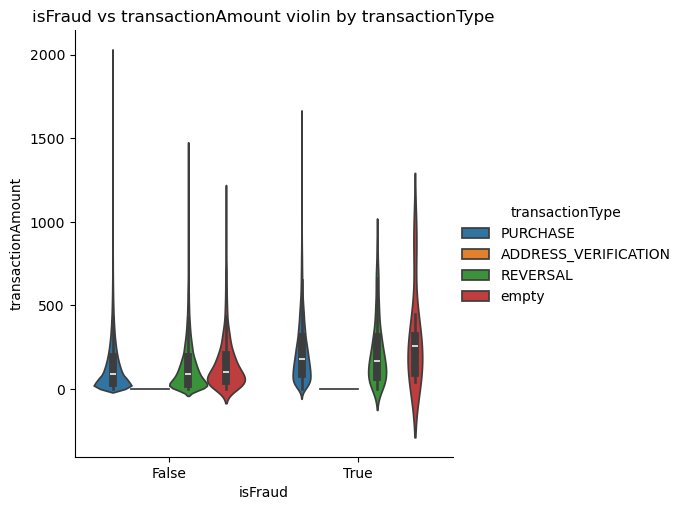

In [36]:
catplot(df.select("isFraud", "transactionAmount", "transactionType"), "isFraud", "transactionAmount", kind="violin", hue="transactionType")
Image(filename="figures/transactionAmount_violinplot_by_isFraud_with_transactionType.png")

Above plot shows that non-fraudulent transactions are concentrated very close to zero in all categories, while fraudulent charges are more spread out. This difference is especially notable for unmarked ("empty") transactions. The average size of the fraudulent transactions are consistently higher across all categories as a result.

In [ ]:
catplot(df.select("isFraud", "transactionAmount", "merchantCategoryCode"), "isFraud", "transactionAmount", kind="violin", hue="merchantCategoryCode", aspect=2)
Image(filename="figures/transactionAmount_violinplot_by_isFraud_with_merchantCategoryCode.png")

In [ ]:
countplot(df.select("isFraud", "cardPresent"), "isFraud", hue="cardPresent", stat="proportion")
Image(filename="figures/isFraud_barchart_with_cardPresent.png")

In [ ]:
countplot(df.select("isFraud", "cardPresent").where(df.isFraud == True), "cardPresent", stat="proportion")
Image(filename="figures/cardPresent_barchart.png")

In [ ]:
countplot(df.select("isFraud", "cardPresent").where(df.isFraud == False), "cardPresent", stat="proportion")
Image(filename="figures/cardPresent_barchart.png")

The two above plots show that while legitimate transactions have roughly equal likelihood of being performed with or without the card present, fraudulent transactions happend predominantly without the card present.